In [1]:
#importing necessary  libraries 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Seattle_WeatherPredicton.csv",sep=",")
temp_max=df["temp_max"]
precipitation=df["precipitation"]


df.head(30)

,date,precipitation,temp_max,temp_min,wind_speed,weather
0,04-01-2012,1.5,8.9,4.4,6.8,rain
1,04-02-2012,0.0,16.7,4.4,3.1,sun
2,04-03-2012,1.5,11.7,3.3,3.1,rain
3,04-04-2012,0.0,10.6,2.8,2.1,sun
4,04-05-2012,4.6,9.4,2.8,1.8,snow
5,04-06-2012,0.3,11.1,3.3,2.6,rain
6,04-07-2012,0.0,16.1,1.7,4.3,sun
7,04-08-2012,0.0,21.1,7.2,4.1,sun
8,04-09-2012,0.0,20.0,6.1,2.1,sun
9,04-10-2012,0.0,17.8,8.9,3.2,rain


In [3]:
x = np.array(temp_max).reshape(-1, 1)
y = np.array(precipitation)

In [4]:
df.drop(["date"],axis=1)

,precipitation,temp_max,temp_min,wind_speed,weather
0,1.5,8.9,4.4,6.8,rain
1,0.0,16.7,4.4,3.1,sun
2,1.5,11.7,3.3,3.1,rain
3,0.0,10.6,2.8,2.1,sun
4,4.6,9.4,2.8,1.8,snow
...,...,...,...,...,...
270,4.1,7.8,3.3,3.2,rain
271,0.0,8.3,3.9,1.7,rain
272,1.5,5.0,3.3,1.7,rain
273,0.0,4.4,0.0,1.8,drizzle


In [5]:
print(df.shape)  #checking dimensions of Dataset

(275, 6)


In [6]:
#Data Preprocessing to clean, organize the data  and read-to-feed to the Machine Learning model.

In [7]:
print(df.info()) #converting raw data to a suitable format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    275 non-null    object 
 1   precipitation           275 non-null    float64
 2   temp_max                275 non-null    float64
 3   temp_min                275 non-null    float64
 4               wind_speed  275 non-null    float64
 5   weather                 275 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.0+ KB
None


In [8]:
df.isnull().sum()*100/len(df)  #checking for null values

date                      0.0
precipitation             0.0
temp_max                  0.0
temp_min                  0.0
            wind_speed    0.0
weather                   0.0
dtype: float64

In [9]:
df.precipitation=np.sqrt(df.precipitation )

In [10]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of                             date  precipitation  temp_max  temp_min  \
0                     04-01-2012       1.224745       8.9       4.4   
1                     04-02-2012       0.000000      16.7       4.4   
2                     04-03-2012       1.224745      11.7       3.3   
3                     04-04-2012       0.000000      10.6       2.8   
4                     04-05-2012       2.144761       9.4       2.8   
..                           ...            ...       ...       ...   
270                   12/27/2012       2.024846       7.8       3.3   
271                   12/28/2012       0.000000       8.3       3.9   
272                   12/29/2012       1.224745       5.0       3.3   
273                   12/30/2012       0.000000       4.4       0.0   
274                   12/31/2012       0.000000       3.3      -1.1   

                 wind_speed  weather  
0                       6.8     rain  
1     

In [11]:
df.weather.unique()

array(['rain', 'sun', 'snow', 'drizzle', 'fog'], dtype=object)

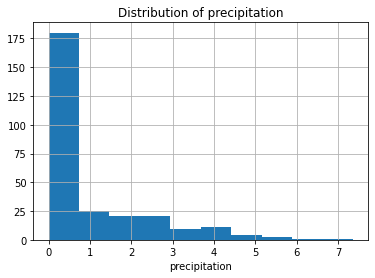

In [12]:
df.precipitation.hist()
plt.title('Distribution of precipitation')
plt.xlabel('precipitation')
plt.show()

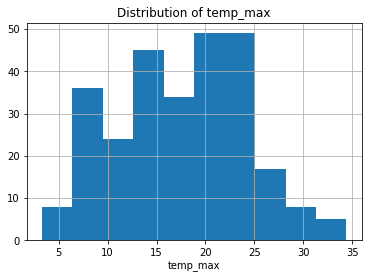

In [13]:
df.temp_max.hist()
plt.title('Distribution of temp_max')
plt.xlabel('temp_max')
plt.show()

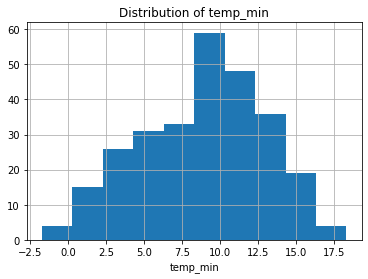

In [14]:
df.temp_min.hist()
plt.title('Distribution of temp_min')
plt.xlabel('temp_min')
plt.show()

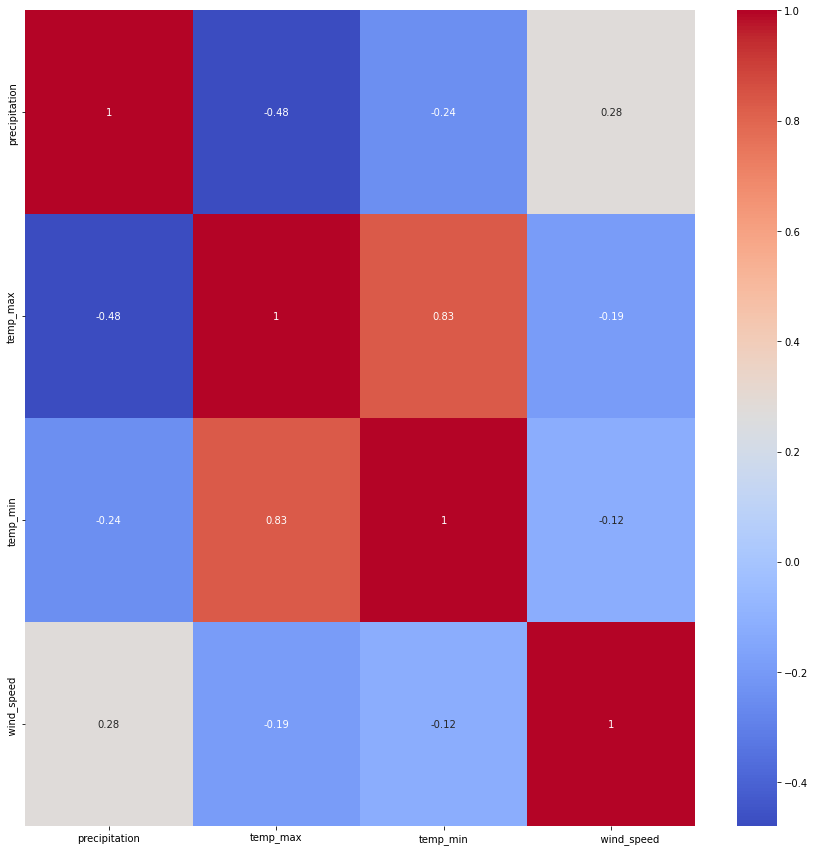

In [15]:
corrmat = df.corr()                               #Visualization to find correlations between the data
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True, cmap='coolwarm')
plt.show()

In [16]:
df.weather.unique()

array(['rain', 'sun', 'snow', 'drizzle', 'fog'], dtype=object)

In [17]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 4
Discrete feature Count 0
Continuous feature Count 4
Categorical feature Count 2


In [18]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

date                      0.0
precipitation             0.0
temp_max                  0.0
temp_min                  0.0
            wind_speed    0.0
weather                   0.0
dtype: float64

In [19]:
print(numerical_feature)

['precipitation', 'temp_max', 'temp_min', '            wind_speed']


In [20]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [21]:
randomsampleimputation(df, "precipitation")
randomsampleimputation(df, "temp_max")
randomsampleimputation(df, "temp_min")


In [22]:
df

,date,precipitation,temp_max,temp_min,wind_speed,weather
0,04-01-2012,1.224745,8.9,4.4,6.8,rain
1,04-02-2012,0.000000,16.7,4.4,3.1,sun
2,04-03-2012,1.224745,11.7,3.3,3.1,rain
3,04-04-2012,0.000000,10.6,2.8,2.1,sun
4,04-05-2012,2.144761,9.4,2.8,1.8,snow
...,...,...,...,...,...,...
270,12/27/2012,2.024846,7.8,3.3,3.2,rain
271,12/28/2012,0.000000,8.3,3.9,1.7,rain
272,12/29/2012,1.224745,5.0,3.3,1.7,rain
273,12/30/2012,0.000000,4.4,0.0,1.8,drizzle


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


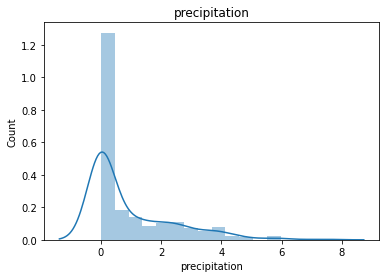

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


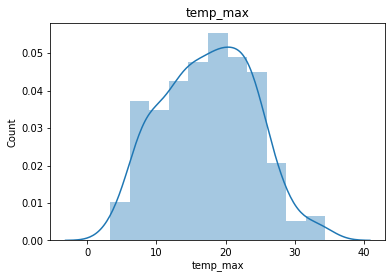

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


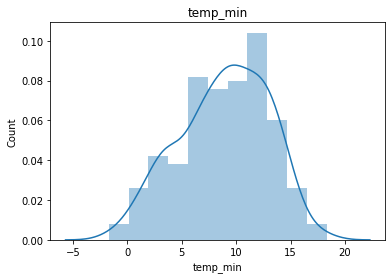

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


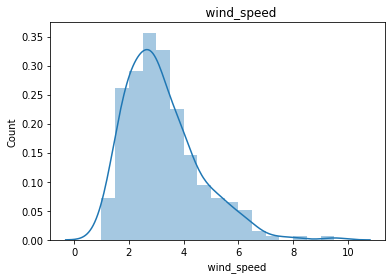

In [23]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

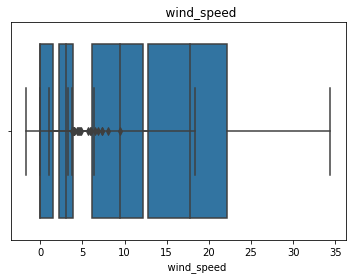

In [24]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)

In [25]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(  x, y, test_size=1/2, random_state=1 )

In [26]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min',
       '            wind_speed', 'weather'],
      dtype='object')

In [27]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit( xtrain, ytrain )

LinearRegression()

In [28]:
regressor.coef_ , regressor.intercept_   #y = mx + c  where m is coefficient , c is intercept

(array([-0.33190618]), 8.963659171104002)

In [29]:
actualValue = ytrain
predictedValue = regressor.predict(xtrain) 
xtrain[0], actualValue[0] , predictedValue[0]

(array([8.3]), 0.0, 6.208837901991238)

In [30]:
regressor.coef_ * xtrain[0] + regressor.intercept_ #y = mx + c

array([6.2088379])

In [31]:
np.sqrt ( sum( abs( actualValue**2 - predictedValue**2 ) ) ) / len( xtrain )   #0.638|
#Finding Root Mean Square Error

0.6462013550360043

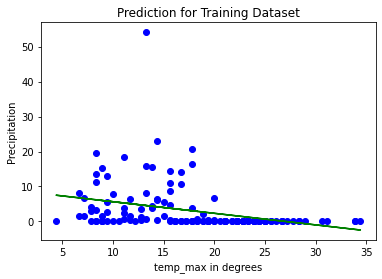

In [32]:
#Graph
# Actual values
plt.scatter(xtrain, ytrain, color='blue') # x = xtrain , y = ytrain

#Predicted values
prediction = regressor.predict(xtrain)
plt.plot(xtrain, prediction , color = 'green') # y = prediction

plt.title ("Prediction for Training Dataset")
plt.xlabel("temp_max in degrees"), plt.ylabel("Precipitation")
plt.show()

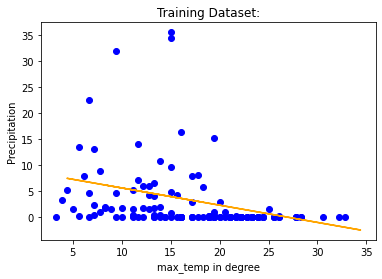

In [33]:
plt.scatter(xtest, ytest, color= 'blue')

plt.plot(xtrain, regressor.predict(xtrain), color = 'orange')

plt.title ("Training Dataset:")
plt.xlabel("max_temp in degree"), plt.ylabel("Precipitation")
plt.show()